In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

In [14]:
# data
df = pd.read_csv('../AnalysisData/all_data.csv')

In [15]:
df.head()

,Unnamed: 0,Year,Sales of cigarettes per adult per day,death_rate_per_100k,Population,deaths per year
0,0,1950,9.3,23.90,158804397,37954
1,1,1951,9.8,25.08,160872264,40347
2,2,1952,10.0,26.90,163266026,43919
3,3,1953,9.7,28.76,165909996,47716
4,4,1954,9.2,29.73,168736390,50165


In [16]:
df['Sum of sales'] =df["Sales of cigarettes per adult per day"].rolling(15, min_periods=1).sum()

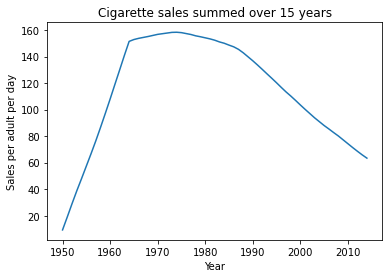

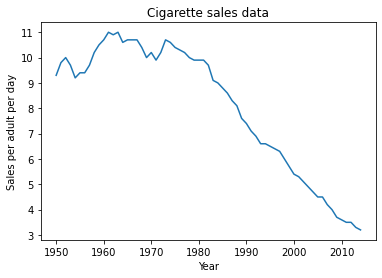

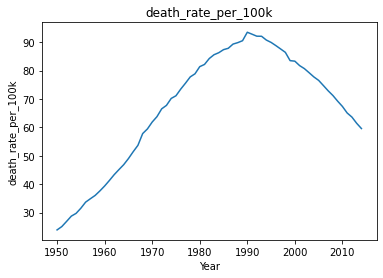

In [17]:

plt.plot(df["Year"], df['Sum of sales'] )
plt.title("Cigarette sales summed over 15 years")
plt.xlabel("Year")
plt.ylabel("Sales per adult per day")
plt.show()

plt.plot(df["Year"], df["Sales of cigarettes per adult per day"] )
plt.title("Cigarette sales data")
plt.xlabel("Year")
plt.ylabel("Sales per adult per day")
plt.show()


plt.plot(df["Year"], df["death_rate_per_100k"])
plt.title("death_rate_per_100k")
plt.xlabel("Year")
plt.ylabel("death_rate_per_100k")
plt.show()

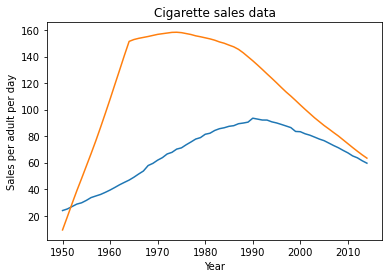

In [18]:
plt.plot(df["Year"], df["death_rate_per_100k"])
plt.plot(df["Year"], df['Sum of sales'] )
plt.title("Cigarette sales data")
plt.xlabel("Year")
plt.ylabel("Sales per adult per day")
plt.show()

In [19]:
df.head()

,Unnamed: 0,Year,Sales of cigarettes per adult per day,death_rate_per_100k,Population,deaths per year,Sum of sales
0,0,1950,9.3,23.90,158804397,37954,9.3
1,1,1951,9.8,25.08,160872264,40347,19.1
2,2,1952,10.0,26.90,163266026,43919,29.1
3,3,1953,9.7,28.76,165909996,47716,38.8
4,4,1954,9.2,29.73,168736390,50165,48.0


In [21]:
input_data = {'N': len(df["deaths per year"]),
              'y': df["deaths per year"],
              'pop': df["Population"]}
model = CmdStanModel(stan_file='./stan_1.stan')
result = model.sample(data=input_data, chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: mismatch in dimension declared and found in context; processing stage=data initialization; variable name=y; position=0; dims declared=(5); dims found=(65) (in '/home/nicolas/Projects/DA_project/CommandFiles/stan_1.stan', line 3, column 4 to column 13)
Exception: mismatch in dimension declared and found in context; processing stage=data initialization; variable name=y; position=0; dims declared=(5); dims found=(65) (in '/home/nicolas/Projects/DA_project/CommandFiles/stan_1.stan', line 3, column 4 to column 13)
Exception: mismatch in dimension declared and found in context; processing stage=data initialization; variable name=y; position=0; dims declared=(5); dims found=(65) (in '/home/nicolas/Projects/DA_project/CommandFiles/stan_1.stan', line 3, column 4 to column 13)
Exception: mismatch in dimension declared and found in context; processing stage=data initialization; variable name=y; position=0; dims declared=(5); dims found=(65) (in '/home/nicolas/Projects/DA_project/CommandFiles/stan_1.stan', line 3, column 4 to column 13)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/nicolas/Projects/DA_project/CommandFiles/stan_1', 'id=1', 'random', 'seed=54306', 'data', 'file=/tmp/tmpu8qsvwd9/q6rxjuse.json', 'output', 'file=/tmp/tmpu8qsvwd9/stan_1-20220611115152_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpu8qsvwd9/stan_1-20220611115152_1.csv
 console_msgs (if any):
	/tmp/tmpu8qsvwd9/stan_1-20220611115152_0-stdout.txt